# Bachelor project: Swarm data
This use panda and my new fuctions to plot the data and half orbit means

In [1]:
import pandas as pd
import numpy as np
import pickle
import os
os.chdir('/home/simon/Desktop/Bachelor_project/code')
import My_functions_v2 as my
import matplotlib.pyplot as plt

## FAC_A and FAC_C and DNS

In [2]:
DNS = my.load_DNS()
DNS = DNS.dropna(how='any')
my.add_orbit(DNS)

TDW.txt: Could not be loaded


In [ ]:
FACA = my.load_FAC('A')
# Adds orbit to FAC based on DNS so orbit nr alling even tho there is data gab in FAC
FACA_add_Orbit = DNS.loc[:,['Orbit_nr','Hemisphere']].reindex(FACA.index,method='nearest')
FACA = pd.concat([FACA,FACA_add_Orbit], axis=1)

FACA.to_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/FAC_A.pkl')

In [ ]:
del FACA

In [3]:
FACC = my.load_FAC('C')

# Adds orbit to FAC based on DNS so orbit nr alling even tho there is data gab in FAC
FACC_add_Orbit = DNS.loc[:,['Orbit_nr','Hemisphere']].reindex(FACC.index,method='nearest')
FACC = pd.concat([FACC,FACC_add_Orbit], axis=1)

FACC.to_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/FAC_C.pkl')


In [4]:
# Free up some memory
del FACC

## Load the data

In [6]:
FAC = my.load_FAC('dual')
FAC = FAC.dropna(how='any')

# Adds orbit to FAC based on DNS so orbit nr alling even tho there is data gab in FAC
FAC_add_Orbit = DNS.loc[:,['Orbit_nr','Hemisphere']].reindex(FAC.index,method='nearest')
FAC = pd.concat([FAC,FAC_add_Orbit], axis=1)


## save unfiltered data

In [7]:
FAC.to_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/FAC_dual.pkl')
DNS.to_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/DNS.pkl')

## Filter FAC

In [8]:
FAC_filter= FAC[(abs(FAC.FAC)<16) & (abs(FAC.Latitude)>40)]

<IPython.core.display.Javascript object>


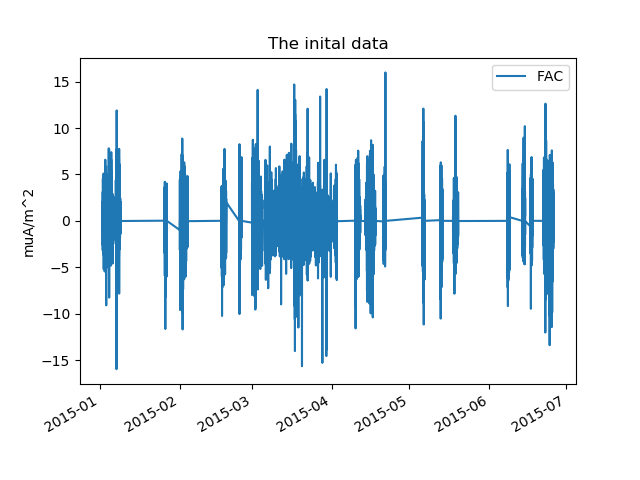

Text(0.5,1,'The inital data')

In [9]:
%matplotlib notebook
plt.figure()

p1 = FAC_filter.FAC.plot(legend=True)
#p2 = FAC_filter.Latitude.plot( style='r',legend=True)
p1.set_ylabel('muA/m^2')
plt.title('The inital data')

In [10]:
FAC_filter.to_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/FAC_filter.pkl')

## Electro jets

In [11]:
Electro_jets = my.get_jets(FAC_filter) 

Add solar time

In [12]:
solar_time = DNS.Local_solar_time.reindex(Electro_jets.index,method='nearest')
Electro_jets = pd.concat([Electro_jets,solar_time], axis=1)

Save the file

In [13]:
Electro_jets.to_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/Electro_jets.pkl')

## Half orbit means
Calculate the half orbit means

In [14]:
FAC_mean=my.orbit_means(FAC_filter)
DNS_mean=my.orbit_means(DNS)

Remove all half orbits with times that diviates more than 6 min

In [15]:
FAC_mean=FAC_mean.loc[abs(FAC_mean.Delta_time-FAC_mean.Delta_time.median())<360]
DNS_mean=DNS_mean.loc[abs(DNS_mean.Delta_time-DNS_mean.Delta_time.median())<360]

## Allign the time index

In [16]:
df1 = FAC_mean.FAC.reindex(DNS_mean.index,method='nearest')
df1.name = 'FAC'
df_allign = pd.concat([df1,DNS_mean.iloc[:,0:3]], axis=1)

<IPython.core.display.Javascript object>


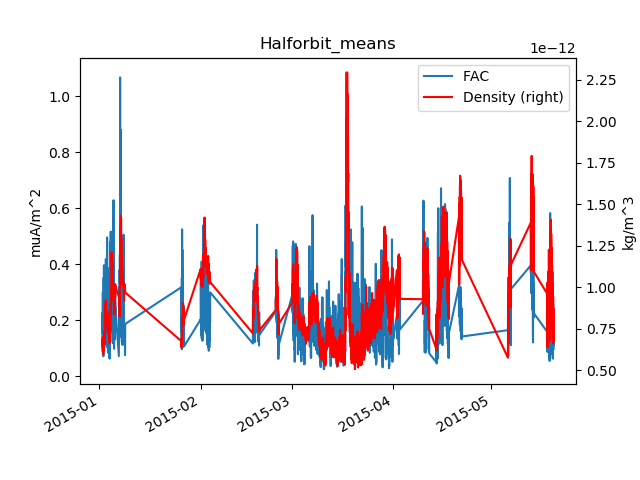

Text(0.5,1,'Halforbit_means')

In [17]:
plt.figure()

p1 = df_allign.FAC.plot(legend=True)
p2 = df_allign.Density.plot(secondary_y=True, style='r',legend=True)
p1.set_ylabel('muA/m^2')
p1.right_ax.set_ylabel('kg/m^3')
plt.title('Halforbit_means')

## Save data for easy acces 

In [18]:
df_allign.to_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/half_orbit_means.pkl')